In [7]:
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize
import statsmodels.api as sm
from matplotlib.pyplot import subplots

In [2]:
dataset = load_data("Auto")
dataset[:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1


In [3]:
design = ModelSpec(["horsepower"])
X = design.fit_transform(dataset)
Y = dataset["mpg"]

In [69]:
model = sm.OLS(Y, X)
results = model.fit()
print(f"{results.rsquared=}")
summarize(results)

results.rsquared=0.6059482578894348


,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [53]:
pred_df = pd.DataFrame({"horsepower": [98]})
pred_X = design.transform(pred_df)
predicts = results.get_prediction(pred_X)
print(f"Predicted mean: {predicts.predicted_mean}")

print(f"confidence: {predicts.conf_int(alpha=0.05)[0]}")
print(f"prediction: {predicts.conf_int(obs=True, alpha=0.05)[0]}")

Predicted mean: [24.46707715]
confidence: [23.97307896 24.96107534]
prediction: [14.80939607 34.12475823]


# Plotting the data

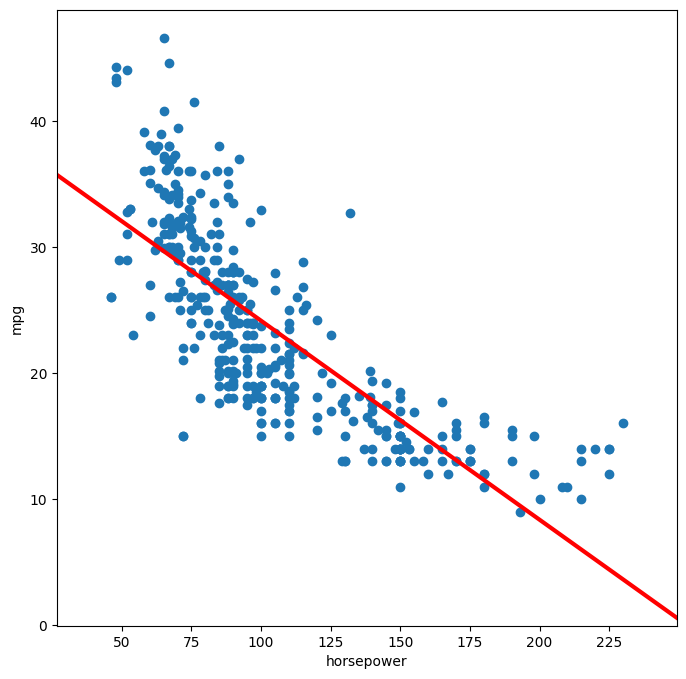

In [67]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(X['horsepower'], Y)
ax.set_xlabel("horsepower")
ax.set_ylabel("mpg")

b = results.params.iloc[0]
m = results.params.iloc[1]
xlim = ax.get_xlim()
ylim = [m*xlim[0] + b, m*xlim[1] + b]
ax.axline((xlim[0], ylim[0]), (xlim[1], ylim[1]), c="r", ls="-", linewidth=3)

## Residuals vs fit

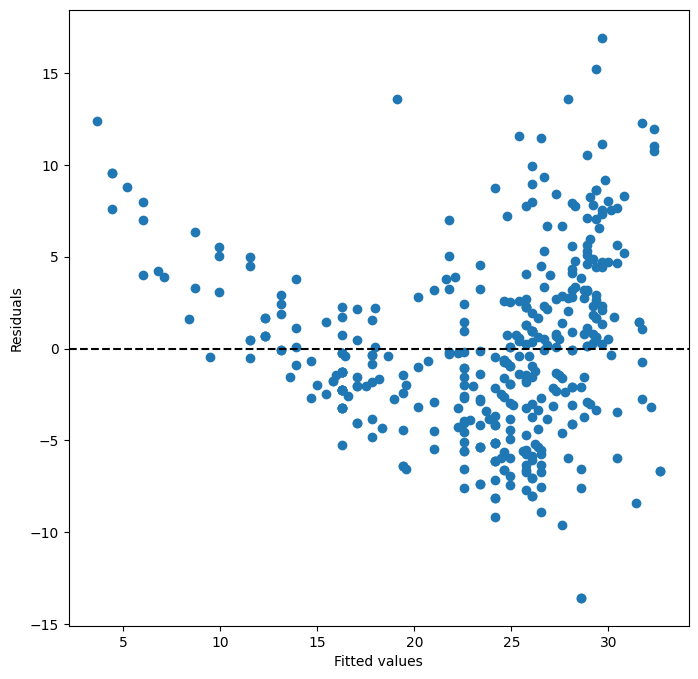

In [60]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.axhline(0, c="k", ls="--")

## thoughts

Especially for the low fitted values, the residuals are big. In the middle they're small-ish, and for the higher fitted values, the residuals spread again, which all indicates non-linearity in the data. Possibly a non-linear (i.e. quadratic model would fit the data better)

Also, a big spread of the Residuals for the high fitted values, indicates that the horsepower alone is a poor predictor for the mpg, in this range. Usage of more variables could benefit. R squared value of 60% confirms that.